In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [70]:
df = pd.read_csv('mlalgorithm.csv')
df.head()

,106.Occupation,109.Have you read conscent form?,202.Age,203.Gender,205. Education qualification for the participant,206.How many family members are there at home?,207.Total income (monthly),301.Are you aware of the term dental fluorosis?,302.Do you k0w that treatment is available for fluoride content in teeth?,304.Have you ever received information about ill effects about excessive fluoride in water from relatives?,...,314.Do you have foul smell inside mouth due to dental fluorosis?,401.Have you ever consulted any dentist regarding the appearance of your teeth?,402. Are you willing to get the treatment done for the appearance of your teeth?,403. Should Govt. step up defluoridation plan for the prevention of Dental fluorosis?,404. Should Govt. provide rebate in RO's for the prevention of Dental fluorosis?,405. Should Govt. make policy for the prevention of Dental fluorosis?,406. Should Govt. launch mass public health campaign for the prevention of Dental fluorosis?,407. Is the appearance of your teeth appealing?,408. Are you embarrassed by the appearance of your teeth?,511. Patient having florosis
0,1,1,18,1,1,4,20000,1,1,1,...,1,0,1,1,1,1,1,1,0,1
1,4,1,54,1,1,6,20000,1,0,1,...,1,0,0,1,1,1,1,1,0,1
2,2,1,47,0,1,6,10000,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,4,1,58,1,1,6,10000,0,0,1,...,1,0,0,1,1,1,1,1,1,1
4,3,1,23,1,1,6,10000,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 28 columns):
 #   Column                                                                                                       Non-Null Count  Dtype
---  ------                                                                                                       --------------  -----
 0   106.Occupation                                                                                               390 non-null    int64
 1   109.Have you read conscent form?                                                                             390 non-null    int64
 2   202.Age                                                                                                      390 non-null    int64
 3   203.Gender                                                                                                   390 non-null    int64
 4   205. Education qualification for the participant                          

In [72]:
classes=df['511. Patient having  florosis'].value_counts()
normal_share=classes[1]/df['511. Patient having  florosis'].count()*100
abnormal_share=classes[0]/df['511. Patient having  florosis'].count()*100

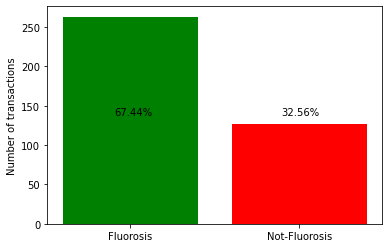

In [73]:
plt.bar(['Fluorosis','Not-Fluorosis'], classes, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(abnormal_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

<AxesSubplot:>

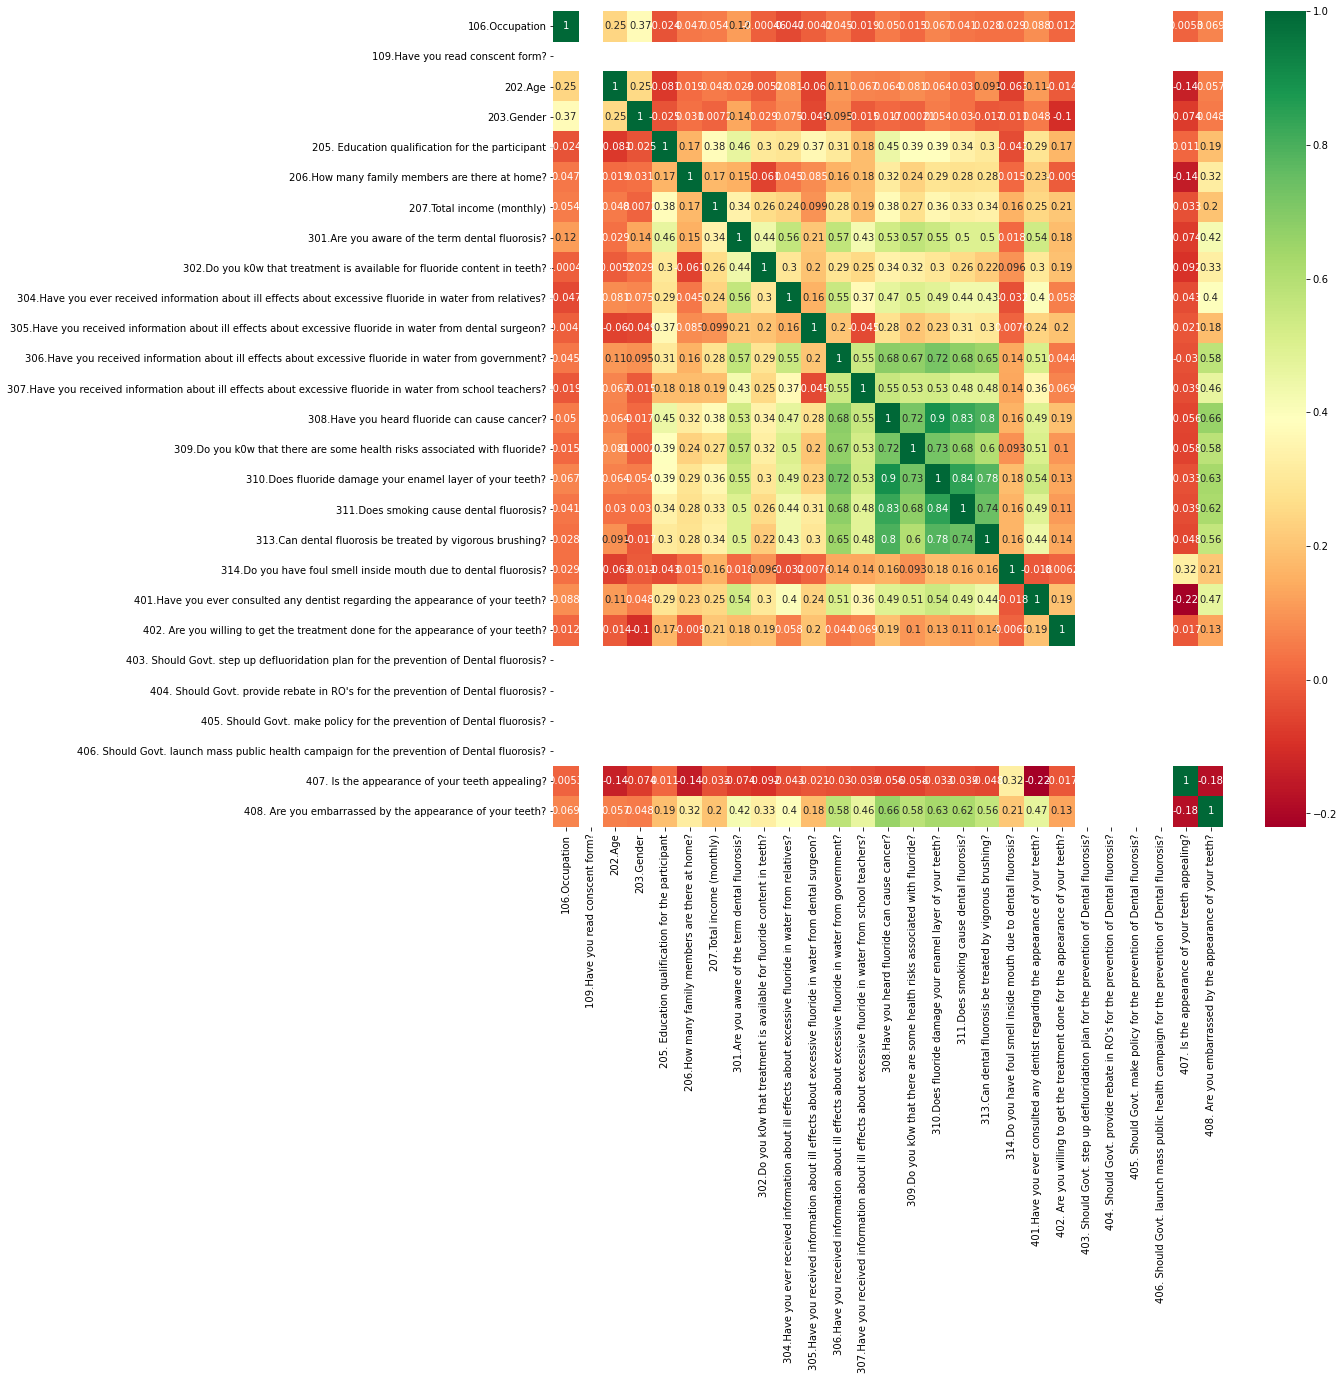

In [89]:
corrmat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df[corrmat.index].corr(),annot=True,cmap="RdYlGn")

In [75]:
y = df['511. Patient having  florosis']
df.drop('511. Patient having  florosis', axis=1, inplace=True)
df.head()

,106.Occupation,109.Have you read conscent form?,202.Age,203.Gender,205. Education qualification for the participant,206.How many family members are there at home?,207.Total income (monthly),301.Are you aware of the term dental fluorosis?,302.Do you k0w that treatment is available for fluoride content in teeth?,304.Have you ever received information about ill effects about excessive fluoride in water from relatives?,...,313.Can dental fluorosis be treated by vigorous brushing?,314.Do you have foul smell inside mouth due to dental fluorosis?,401.Have you ever consulted any dentist regarding the appearance of your teeth?,402. Are you willing to get the treatment done for the appearance of your teeth?,403. Should Govt. step up defluoridation plan for the prevention of Dental fluorosis?,404. Should Govt. provide rebate in RO's for the prevention of Dental fluorosis?,405. Should Govt. make policy for the prevention of Dental fluorosis?,406. Should Govt. launch mass public health campaign for the prevention of Dental fluorosis?,407. Is the appearance of your teeth appealing?,408. Are you embarrassed by the appearance of your teeth?
0,1,1,18,1,1,4,20000,1,1,1,...,0,1,0,1,1,1,1,1,1,0
1,4,1,54,1,1,6,20000,1,0,1,...,0,1,0,0,1,1,1,1,1,0
2,2,1,47,0,1,6,10000,0,0,0,...,0,1,1,1,1,1,1,1,1,1
3,4,1,58,1,1,6,10000,0,0,1,...,1,1,0,0,1,1,1,1,1,1
4,3,1,23,1,1,6,10000,1,1,1,...,0,1,1,1,1,1,1,1,1,0


In [76]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, stratify=y, random_state=0)

In [77]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

263
197
66


In [78]:

num_cv_splits = 3
skf = model_selection.StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

In [81]:
from sklearn import preprocessing

from sklearn import metrics

In [82]:
# Logistic Regression

from sklearn import linear_model

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        clf = linear_model.LogisticRegression(C=C_val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])

C_val = 0.001 ; auc = 0.665719696969697 ; cv_num = 0
C_val = 0.01 ; auc = 0.8584280303030303 ; cv_num = 0
C_val = 0.1 ; auc = 0.9673295454545454 ; cv_num = 0
C_val = 1.0 ; auc = 0.9933712121212122 ; cv_num = 0
C_val = 10.0 ; auc = 0.9952651515151515 ; cv_num = 0
C_val = 100.0 ; auc = 0.9933712121212122 ; cv_num = 0
C_val = 1000.0 ; auc = 0.9867424242424243 ; cv_num = 0
C_val = 0.001 ; auc = 0.6373411534701857 ; cv_num = 1
C_val = 0.01 ; auc = 0.7839687194525905 ; cv_num = 1
C_val = 0.1 ; auc = 0.949169110459433 ; cv_num = 1
C_val = 1.0 ; auc = 0.9745845552297165 ; cv_num = 1
C_val = 10.0 ; auc = 0.9740957966764419 ; cv_num = 1
C_val = 100.0 ; auc = 0.9682306940371457 ; cv_num = 1
C_val = 1000.0 ; auc = 0.9765395894428153 ; cv_num = 1
C_val = 0.001 ; auc = 0.6365384615384616 ; cv_num = 2
C_val = 0.01 ; auc = 0.7793269230769231 ; cv_num = 2
C_val = 0.1 ; auc = 0.9778846153846155 ; cv_num = 2
C_val = 1.0 ; auc = 0.9807692307692308 ; cv_num = 2
C_val = 10.0 ; auc = 0.9716346153846154 ; cv_

In [83]:
# Random Forest

from sklearn import ensemble

initial_trees = 801
num_trees = 899
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 801 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 802 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 803 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 804 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 805 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 806 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 807 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 808 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 809 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 810 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 811 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 812 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 813 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 814 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 815 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 816 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 817 ; auc = 0.9895833333333334 ; cv_num = 0
num_trees = 818 ; auc = 0.9895833333333334 ; cv_

num_trees = 849 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 850 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 851 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 852 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 853 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 854 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 855 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 856 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 857 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 858 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 859 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 860 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 861 ; auc = 0.9780058651026392 ; cv_num = 1
num_trees = 862 ; auc = 0.978494623655914 ; cv_num = 1
num_trees = 863 ; auc = 0.978494623655914 ; cv_num = 1
num_trees = 864 ; auc = 0.978494623655914 ; cv_num = 1
num_trees = 865 ; auc = 0.978494623655914 ; cv_num = 1
num_trees = 866 ; auc = 0.978494623655914 ; cv_num =

num_trees = 897 ; auc = 0.9850961538461539 ; cv_num = 2
num_trees = 898 ; auc = 0.9850961538461539 ; cv_num = 2
num_trees = 899 ; auc = 0.9846153846153847 ; cv_num = 2
Best num_trees: 862
Best auc corresponding to Best num_trees : 0.9842335419956388


Top var = 19
2nd Top var = 26
3rd Top var = 3


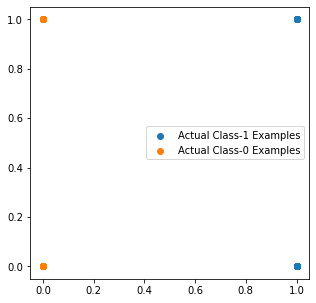

In [90]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()